In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('novo_campeonato_brasileiro.csv')
df.head()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN


In [3]:
df.tail()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS
6881,2019.38.0376,08/12/2019,2019,38,Vasco,Chapecoense,1,1,RJ,SC,Empate,Maracanã,NaN
6882,2019.38.0377,08/12/2019,2019,38,Botafogo-RJ,Ceará,1,1,RJ,CE,Empate,Engenhão,NaN
6883,2019.38.0378,08/12/2019,2019,38,Avaí,Athletico-PR,0,0,SC,PR,Empate,Ressacada,NaN
6884,2019.38.0379,08/12/2019,2019,38,Goiás,Grêmio,3,2,GO,RS,Mandante,Serra Dourada,NaN
6885,2019.38.0380,08/12/2019,2019,38,CSA,São Paulo,1,2,AL,SP,Visitante,Rei Pelé,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6886 entries, 0 to 6885
Data columns (total 13 columns):
ID                  6886 non-null object
Data                6886 non-null object
Ano                 6886 non-null int64
Rodada              6886 non-null int64
Equipe_mandante     6886 non-null object
Equipe_visitante    6886 non-null object
Gols_mandante       6886 non-null int64
Gols_visitante      6886 non-null int64
Mandante_UF         6886 non-null object
Visitante_UF        6886 non-null object
Vencedor            6886 non-null object
Arena               6886 non-null object
OBS                 11 non-null object
dtypes: int64(4), object(9)
memory usage: 699.4+ KB


In [5]:
m=0
v=0
e=0
for i in df['Vencedor']:
    if i=='Mandante':
        m+=1
    elif i=='Empate':
        e+=1
    else:
        v+=1

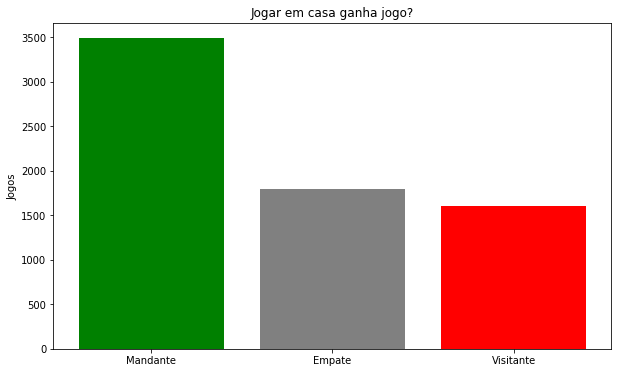

In [62]:
plt.figure(figsize=(10,6))
plt.bar(['Mandante','Empate','Visitante'],[m,e,v], color=['green','grey','red']);
plt.title('Jogar em casa ganha jogo?');
plt.ylabel('Jogos');

In [7]:
def vencedor(x):
    if x['Vencedor']=='Mandante':
        return x['Equipe_mandante']
    if x['Vencedor']=='Visitante':
        return x['Equipe_visitante']
    else:
        return 'Empate'
    
def derrotado(x):
    if x['Vencedor']=='Mandante':
        return x['Equipe_visitante']
    if x['Vencedor']=='Visitante':
        return x['Equipe_mandante']
    else:
        return 'Empate'

df['Clube_vencedor'] = df.apply(vencedor, axis=1)
df['Clube_derrotado'] = df.apply(derrotado, axis=1)

df.head()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS,Clube_vencedor,Clube_derrotado
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN,Guarani,Vasco
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN,Athletico-PR,Grêmio
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN,Empate,Empate
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN,Empate,Empate
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN,Empate,Empate


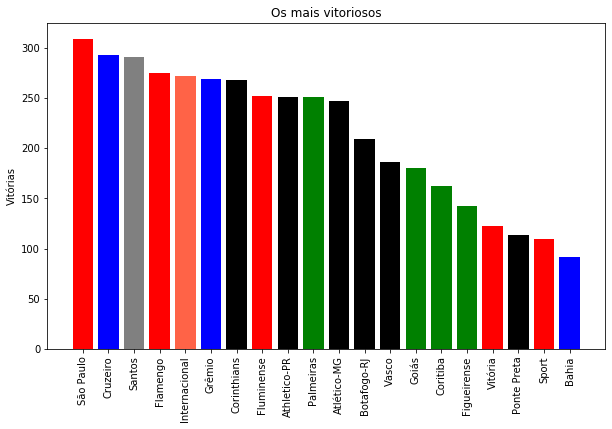

In [22]:
plt.figure(figsize=(10,6))
plt.bar(df['Clube_vencedor'].value_counts().index[1:21],df['Clube_vencedor'].value_counts()[1:21],color=['red','blue','grey','red','tomato','blue','black','red','black','green','black','black','black','green','green','green','red','black','red','blue']);
plt.xticks(rotation=90);
plt.title('Os mais vitoriosos');
plt.ylabel('Vitórias');

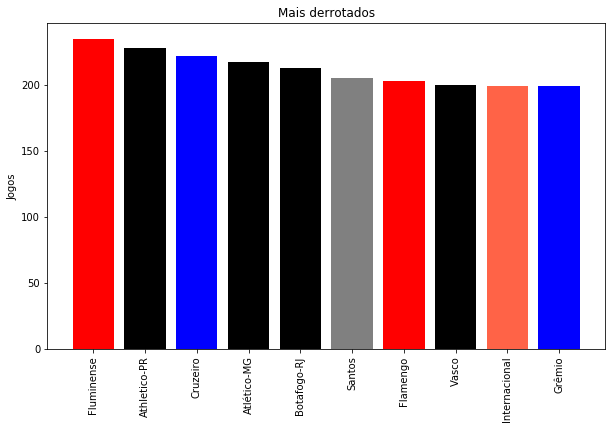

In [51]:
plt.figure(figsize=(10,6))
plt.bar(df['Clube_derrotado'].value_counts().index[1:11],df['Clube_derrotado'].value_counts()[1:11],color=['red','black','blue','black','black','grey','red','black','tomato','blue']);
plt.title('Mais derrotados');
plt.ylabel('Jogos')
plt.xticks(rotation=90);